In [1]:
import pycaret
pycaret.__version__
import pandas as pd

from pycaret.regression import *

TRAIN_PATH = '123181_train_withF.csv'
TEST_PATH = '123181_test_withF.csv'

train = pd.read_csv(TRAIN_PATH,index_col='Timestamp')
test = pd.read_csv(TEST_PATH,index_col='Timestamp')

print(train.columns)

Index(['Open', 'High', 'Low', 'Volume', 'Turnover', 'Close', 'Avg',
       'log_ret_close_1min', 'BBANDS_close_16min_up', 'BBANDS_close_16min_mid',
       'BBANDS_close_16min_low', 'MACD_close_F12S26S9', 'RSI_close_12min',
       'SAR', 'BB_hit_wall', 'Target_Close_1min', 'Target_Avg_1min',
       'STOCK_log_ret_close_1min', 'STOCK_MACD_close_F12S26S9',
       'STOCK_RSI_close_12min', 'STOCK_SAR', 'STOCK_BB_hit_wall'],
      dtype='object')


In [2]:
test = test[['log_ret_close_1min','MACD_close_F12S26S9', 'RSI_close_12min',
       'SAR','BB_hit_wall', 'Target_Avg_1min', 'STOCK_log_ret_close_1min', 
       'STOCK_MACD_close_F12S26S9', 'STOCK_RSI_close_12min', 'STOCK_SAR', 'STOCK_BB_hit_wall']]

train = train[['log_ret_close_1min','MACD_close_F12S26S9', 'RSI_close_12min',
       'SAR','BB_hit_wall', 'Target_Avg_1min', 'STOCK_log_ret_close_1min', 
       'STOCK_MACD_close_F12S26S9', 'STOCK_RSI_close_12min', 'STOCK_SAR', 'STOCK_BB_hit_wall']]

In [3]:
from pycaret.regression import RegressionExperiment
# from pycaret.regression import *
exp = RegressionExperiment()
type(exp)

pycaret.regression.oop.RegressionExperiment

<Axes: xlabel='Timestamp'>

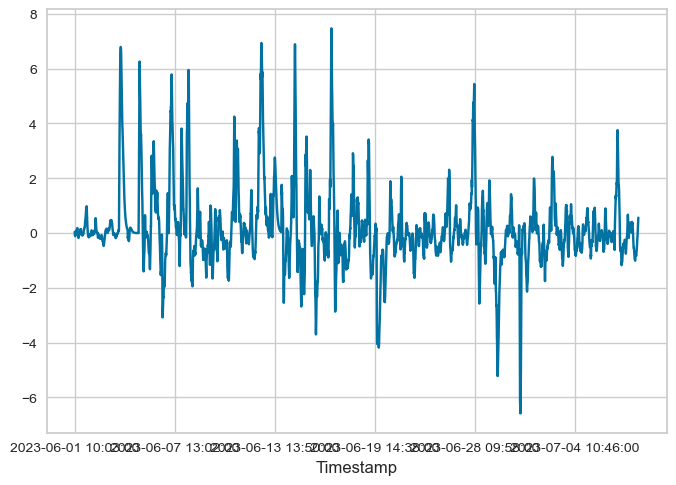

In [15]:
train['MACD_close_F12S26S9'].tail(20000).plot()

In [4]:
setup(data=train, data_split_shuffle = False,preprocess = False, feature_selection= True,target='Target_Avg_1min', session_id = 123)

# setup(data=train,target='Target_Avg_1min', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Target_Avg_1min
2,Target type,Regression
3,Original data shape,"(5638, 11)"
4,Transformed data shape,"(5638, 11)"
5,Transformed train set shape,"(3946, 11)"
6,Transformed test set shape,"(1692, 11)"
7,Numeric features,10


In [5]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0023,0.0000,0.0032,0.0270,0.0027,441173207111.4064,0.8430
dummy,Dummy Regressor,0.0023,0.0000,0.0034,-0.0094,0.0033,13347779175.4296,0.6800


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [6]:
evaluate_model(best)
print(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

LGBMRegressor(random_state=123)


In [7]:
# tuned = tune_model(best)

In [8]:
# test = test.drop(['Target_Avg_1min'], axis=1)
predictions = predict_model(best, data = test)
# predictions = predict_model(best, data = train)

predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0011,0.0000,0.0018,0.0181,0.0015,2.5607


,log_ret_close_1min,MACD_close_F12S26S9,RSI_close_12min,SAR,BB_hit_wall,STOCK_log_ret_close_1min,STOCK_MACD_close_F12S26S9,STOCK_RSI_close_12min,STOCK_SAR,STOCK_BB_hit_wall,Target_Avg_1min,prediction_label
Timestamp,,,,,,,,,,,,
2023-07-07 10:03:00,0.001901,-1.157797,41.029339,292.663910,0.589645,0.001228,-0.614522,35.463272,64.844002,0.529465,0.002539,-0.000192
2023-07-07 10:04:00,0.003311,-0.962170,47.126896,292.737335,1.092799,0.002451,-0.552356,40.162487,64.884483,0.799080,0.000403,-0.000277
2023-07-07 10:05:00,-0.000288,-0.804717,46.668438,292.895660,1.013259,0.003360,-0.479805,46.054516,64.932030,1.219905,0.002365,-0.000437
2023-07-07 10:06:00,0.001489,-0.637086,49.445671,293.044495,1.161700,0.002893,-0.402340,50.634212,65.009789,1.340062,-0.001827,-0.000291
2023-07-07 10:07:00,-0.002005,-0.545716,45.934704,293.270996,0.897531,0.001671,-0.328287,53.146400,65.120415,1.144478,-0.000113,-0.001333
